### Autosklearn

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,balanced_accuracy_score,auc,f1_score
from sklearn.model_selection import train_test_split


In [18]:
datasets = [file[26+8:-4] for file in glob.glob('./autosklearn/store_prediction_2h/*.csv')]

In [22]:
def scores(y_hat,y_test):
    acc = accuracy_score(y_hat,y_test)
    bacc = balanced_accuracy_score(y_hat,y_test)
    if max(y_test)-min(y_test)==1:
        f1 = f1_score(y_hat,y_test)
    else:
        f1 = f1_score(y_hat,y_test,average='micro')
    return acc,bacc,f1

In [23]:
def auto_store(datasets,hour):
    compare_df = pd.DataFrame(columns=['dataset','auto_half_acc','auto_half_bacc','auto_half_f1'])
    for name in datasets:
        df_name = 'autosklearn/store_prediction_'+ hour +'/'+ name + '.csv'
        #df_name = 'autosklearn/store_prediction_half_h/' + name + '.csv' half_h, 1h, 2h
        df = pd.read_csv(df_name)
        y_hat = df.iloc[0,:]
        y_test = df.iloc[1,:]
        half_acc,half_bacc,half_f1 = scores(y_hat,y_test)
        one_series = pd.Series([name,half_acc,half_bacc,half_f1],['dataset','auto_half_acc','auto_half_bacc','auto_half_f1'])
        compare_df = compare_df.append(one_series,ignore_index=True)
    return compare_df

In [19]:
auto_one = auto_store(datasets,'2h')

In [20]:
auto_one.head()

dataset  auto_half_acc  auto_half_bacc  \
0                  analcatdata_dmft       0.175000        0.186355   
1                    bank-marketing       0.905673        0.784086   
2           banknote-authentication       1.000000        1.000000   
3                       Bioresponse       0.455393        0.455393   
4  blood-transfusion-service-center       0.786667        0.749401   

   auto_half_f1  
0      0.175000  
1      0.947774  
2      1.000000  
3      0.000000  
4      0.864407

In [21]:
auto_one.to_csv('auto_two_hour.csv',index=None)

In [22]:
auto_one.shape

(32, 4)

In [107]:
result.to_csv('autosklearn_store.csv',index=None)

### MCTML

In [13]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score,auc,f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from search_space import check_list

In [24]:
def state_to_pipeline(state):
    pipe = []
    for i in range(3):
        params = dict(list(map(list, state[i+3])))
        check_list[state[i]].update(params)
        pipe.append((state[i],check_list[state[i]].model))
    return Pipeline(pipe)

In [25]:
def load_dataset(dataset_name,random_number):
    print("Loading the dataset:",dataset_name)
    df = pd.read_csv(dataset_name)
    X = np.array(df.iloc[:,:-1])
    y = np.array(df.iloc[:,-1])
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_number)
    return X_train,X_test,y_train,y_test

In [26]:
def scores(y_hat,y_test):
    acc = accuracy_score(y_hat,y_test)
    bacc = balanced_accuracy_score(y_hat,y_test)
    if max(y_test)-min(y_test)==1:
        f1 = f1_score(y_hat,y_test)
    else:
        f1 = f1_score(y_hat,y_test,average='micro')
    return acc,bacc,f1

In [27]:
def get_new_score(name,p,random_number):
    dataset_name = 'autosklearn/datasets/'+ name + '.csv'
    X_train,X_test,y_train,y_test = load_dataset(dataset_name,random_number)
    pipe = state_to_pipeline(p)
    pipe.fit(X_train,y_train)
    y_hat = pipe.predict(X_test)
    acc,bacc,f1 = scores(y_hat,y_test)
    one_series = pd.Series([name,acc,bacc,f1],['dataset','mct_half_acc','mct_half_bacc','mct_half_f1'])
    return one_series

In [18]:
compare_df = pd.DataFrame(columns=['dataset','mct_half_acc','mct_half_bacc','mct_half_f1'])
#compare_df.to_csv('half_hour_mcts.csv',index=False)

def mct_store(datasets,ps_one):
    compare_df = pd.DataFrame(columns=['dataset','mct_half_acc','mct_half_bacc','mct_half_f1'])
    for i in range(len(datasets)):
        one_series = get_new_score(datasets[i],ps[i])
        compare_df = compare_df.append(one_series,ignore_index=True)
    return compare_df

In [148]:
result = pd.concat([mct_half,mct_one.iloc[:,1:],mct_two.iloc[:,1:]], axis=1, join='inner')

In [153]:
result.to_csv('mctml_store.csv',index=None)

#### Compare

In [157]:
result_atuo = pd.read_csv('autosklearn_store.csv')

In [160]:
result_mct = pd.read_csv('mctml_store.csv')

In [161]:
result_mct

dataset  mct_half_acc  mct_half_bacc  mct_half_f1  \
0             Cylinder-bands      0.796296       0.784127     0.830769   
1  dataset_16_mfeat-karhunen      0.950000       0.952443     0.950000   
2        dataset_31_credit-g      0.750000       0.707196     0.838710   
3              dresses-sales      0.520000       0.498904     0.630769   
4                    madelon      0.815385       0.822114     0.835052   
5                qsar-biodeg      0.838863       0.838049     0.876812   
6      wall-robot-navigation      0.991758       0.989984     0.991758   

   mct_one_acc  mct_one_bacc  mct_one_f1  mct_two_acc  mct_two_bacc  \
0     0.851852      0.841503    0.878788     0.787037      0.774265   
1     0.950000      0.952443    0.950000     0.970000      0.971841   
2     0.750000      0.707196    0.838710     0.750000      0.707196   
3     0.520000      0.498904    0.630769     0.520000      0.498904   
4     0.815385      0.822114    0.835052     0.815385      0.822114   
5     0.838863      0.838049    0.876812     0.843602      0.855574   
6     0.992674      0.991469    0.992674     0.994505      0.993570   

   mct_two_f1  
0    0.829630  
1    0.970000  
2    0.838710  
3    0.630769  
4    0.835052  
5    0.883392  
6    0.994505

In [170]:
acc_auto = result_atuo.iloc[:,[0,1,4,7]]

In [172]:
acc_mct = result_mct.iloc[:,[1,4,7]]

In [174]:
acc = pd.concat([acc_auto,acc_mct],axis=1)

In [175]:
acc

dataset  auto_half_acc  auto_one_acc  auto_two_acc  \
0             Cylinder-bands       0.777778      0.787037      0.805556   
1  dataset_16_mfeat-karhunen       0.960000      0.975000      0.972500   
2        dataset_31_credit-g       0.740000      0.755000      0.745000   
3              dresses-sales       0.570000      0.580000      0.470000   
4                    madelon       0.525000      0.838462      0.871154   
5                qsar-biodeg       0.838863      0.815166      0.857820   
6      wall-robot-navigation       0.999084      0.999084      1.000000   

   mct_half_acc  mct_one_acc  mct_two_acc  
0      0.796296     0.851852     0.787037  
1      0.950000     0.950000     0.970000  
2      0.750000     0.750000     0.750000  
3      0.520000     0.520000     0.520000  
4      0.815385     0.815385     0.815385  
5      0.838863     0.838863     0.843602  
6      0.991758     0.992674     0.994505

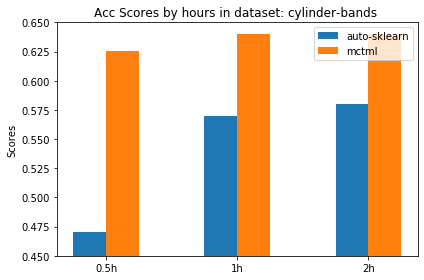

In [213]:
labels = ['0.5h','1h','2h']
#acc_auto = [0.7777777777777778, 0.7870370370370371,0.8055555555555556]
#acc_mct = [ 0.7870370370370371,0.7962962962962963, 0.8518518518518519]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acc_auto, width, label='auto-sklearn')
rects2 = ax.bar(x + width/2, acc_mct, width, label='mctml')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Acc Scores by hours in dataset: cylinder-bands ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0.45,0.65])
fig.tight_layout()
plt.show()

#### Compare acc of half hour (MCTS score from records)

In [168]:
def true_or_false(x):
    if np.abs(x) <= 0.01:
        return 'Draw'
    elif x>0:
        return 'Lose'
    else:
        return 'Win'

In [170]:
#dfObj.apply(lambda x : x + 10)
half_acc['mct_win'] = half_acc['mct_win'].apply(lambda x:true_or_false(x))

In [171]:
half_acc

dataset  auto_half_acc  mct_half_acc mct_win
0                               adult       0.855461      0.807719    Lose
1                    analcatdata_dmft       0.187500      0.276631     Win
2                      bank-marketing       0.906226      0.852466    Lose
3             banknote-authentication       1.000000      1.000000    Draw
5                                 car       0.982659      0.838633    Lose
6                               churn       0.953000      0.866999    Lose
7            climate-model-simulation       0.962963      0.881843    Lose
8                              cnae-9       0.935185      0.773209    Lose
10                     cylinder-bands       0.787037      0.780086    Draw
11           dataset_11_balance-scale       1.000000      0.984017    Lose
13           dataset_14_mfeat-fourier       0.837500      0.805623    Lose
14          dataset_16_mfeat-karhunen       0.975000      0.960041    Lose
15     dataset_18_mfeat-morphological       0.762500      0.731884    Lose
16             dataset_194_eucalyptus       0.641892      0.626135    Lose
17           dataset_22_mfeat-zernike       0.852500      0.828719    Lose
18               dataset_28_optdigits       0.985765      0.975543    Lose
19                dataset_29_credit-a       0.869565      0.867710    Draw
20                dataset_31_credit-g       0.755000      0.748832    Draw
21               dataset_32_pendigits       0.992269      0.978059    Lose
22                dataset_37_diabetes       0.753247      0.771952     Win
23                    dataset_38_sick       0.985430      0.981775    Draw
24                 dataset_3_kr-vs-kp       0.993750      0.987878    Draw
25                dataset_44_spambase       0.950054      0.948371    Draw
26                  dataset_46_splice       0.962382      0.899702    Lose
27             dataset_50_tic-tac-toe       1.000000      0.985663    Lose
28                 dataset_54_vehicle       0.723529      0.854886     Win
29                                dna       0.949843      0.850838    Lose
30                      dresses-sales       0.580000      0.625227     Win
32        first-order-theorem-proving       0.584150      0.496340    Lose
33  GesturePhaseSegmentationProcessed       0.656203      0.546717    Lose
34                                har       0.983495      0.869518    Lose
35                               ilpd       0.726496      0.757586     Win
36            Internet-Advertisements       0.975610      0.964166    Lose
37                             isolet       0.951282      0.784879    Lose
39                                kc1       0.872038      0.861877    Lose
40                                kc2       0.809524      0.856139     Win
41                            madelon       0.838462      0.704811    Lose
42                        mfeat-plxel       0.935000      0.850639    Lose
43                        MiceProtein       1.000000      1.000000    Draw
45                   openml_phpJNxH0q       0.985714      0.966006    Lose
46                    ozone-level-8hr       0.896392      0.871848    Lose
47                                pc1       0.932432      0.939141    Draw
48                                pc3       0.894569      0.902406    Draw
49                                pc4       0.907534      0.914220    Draw
50                   PhishingWebsites       0.966983      0.938264    Lose
51                          phpdReP6S       0.938856      0.942777    Draw
52                        qsar-biodeg       0.815166      0.865000     Win
53                            semeion       0.949843      0.884600    Lose
54                 steel-plates-fault       0.789203      0.730708    Lose
55                            texture       1.000000      0.992269    Draw
56                              vowel       0.964646      0.974714     Win
57              wall-robot-navigation       0.999084      0.990145    Draw
58                               wdbc       0.938596   

In [177]:
#Half_acc  Total: 54, win:15 Draw:9 Loss:30

#### Compare half_hour acc (from pipeline)

In [3]:
acc_datasets = [file[10:-4] for file in glob.glob('./Storage/*.txt')]

In [8]:
acc_parameters = [
    ['quantile', 'kernel_pca', 'knn', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))],
    ['norm', 'kernel_pca', 'lsvc', (('norm', 'l2'),), (('n_components', 10), ('kernel', 'poly')), (('C', 0.03), ('tol', 1e-05))],
    ['quantile', 'kernel_pca', 'decision_tree', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('n_components', 10), ('kernel', 'poly')), (('criterion', 'gini'), ('min_samples_split', 2), ('min_samples_leaf', 2))],
    ['quantile', 'polynomial', 'knn', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))],
    ['norm', 'kernel_pca', 'knn', (('norm', 'l1'),), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))],
    ['quantile', 'polynomial', 'decision_tree', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('criterion', 'gini'), ('min_samples_split', 2), ('min_samples_leaf', 2))],
    ['robust', 'kernel_pca', 'knn', (('quantile_range', (25.0, 75.0)),), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['minmax', 'polynomial', 'mnb', (('feature_range', (0, 1)),), (('degree', 2), ('interaction_only', True), ('include_bias', True)), (('alpha', 0.01), ('fit_prior', True))],
    ['robust', 'kernel_pca', 'knn', (('quantile_range', (25.0, 75.0)),), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))],
    ['minmax', 'polynomial', 'rf', (('feature_range', (0, 1)),), (('degree', 2), ('interaction_only', False), ('include_bias', False)), (('n_estimators', 10), ('criterion', 'gini'), ('max_features', 0.1), ('min_samples_split', 2))],
    ['norm', 'kernel_pca', 'qda', (('norm', 'max'),), (('n_components', 10), ('kernel', 'poly')), (('tol', 0.0001), ('reg_param', 0.0))] ,
    ['norm', 'pca', 'knn', (('norm', 'l1'),), (('tol', 0.01),), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['norm', 'polynomial', 'knn', (('norm', 'l1'),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['minmax', 'polynomial', 'knn', (('feature_range', (0, 1)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['robust', 'polynomial', 'lsvc', (('quantile_range', (30.0, 70.0)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('C', 0.03), ('tol', 1e-05))] ,
    ['robust', 'polynomial', 'rf', (('quantile_range', (30.0, 70.0)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_estimators', 10), ('criterion', 'gini'), ('max_features', 0.1), ('min_samples_split', 2))] ,
    ['minmax', 'pca', 'knn', (('feature_range', (0, 1)),), (('tol', 0.01),), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['norm', 'polynomial', 'knn', (('norm', 'l1'),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['quantile', 'polynomial', 'rf', (('n_quantiles', 1005), ('output_distribution', 'uniform')), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_estimators', 10), ('criterion', 'gini'), ('max_features', 0.1), ('min_samples_split', 2))] ,
    ['quantile', 'polynomial', 'lsvc', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('C', 0.03), ('tol', 1e-05))] ,
    ['quantile', 'kernel_pca', 'knn', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['robust', 'pca', 'lsvc', (('quantile_range', (25.0, 75.0)),), (('tol', 0.01),), (('C', 0.03), ('tol', 1e-05))],
    ['minmax', 'polynomial', 'decision_tree', (('feature_range', (0, 1)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('criterion', 'gini'), ('min_samples_split', 2), ('min_samples_leaf', 2))] ,
    ['minmax', 'polynomial', 'rf', (('feature_range', (0, 1)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_estimators', 10), ('criterion', 'gini'), ('max_features', 0.1), ('min_samples_split', 2))],
    ['quantile', 'pca', 'knn', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('tol', 0.01),), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['robust', 'polynomial', 'decision_tree', (('quantile_range', (25.0, 75.0)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('criterion', 'gini'), ('min_samples_split', 2), ('min_samples_leaf', 2))] ,
    ['robust', 'pca', 'decision_tree', (('quantile_range', (30.0, 70.0)),), (('tol', 0.01),), (('criterion', 'gini'), ('min_samples_split', 2), ('min_samples_leaf', 2))] ,
    ['robust', 'pca', 'qda', (('quantile_range', (25.0, 75.0)),), (('tol', 0.01),), (('tol', 0.0001), ('reg_param', 0.0))] ,
    ['minmax', 'pca', 'knn', (('feature_range', (0, 1)),), (('tol', 0.01),), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['quantile', 'polynomial', 'decision_tree', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('criterion', 'gini'), ('min_samples_split', 2), ('min_samples_leaf', 2))] ,
    ['quantile', 'kernel_pca', 'knn', (('n_quantiles', 507), ('output_distribution', 'normal')), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['minmax', 'polynomial', 'knn', (('feature_range', (0, 1)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))],
    ['norm', 'polynomial', 'knn', (('norm', 'l1'),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['quantile', 'kernel_pca', 'knn', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))],
    ['quantile', 'kernel_pca', 'knn', (('n_quantiles', 10), ('output_distribution', 'normal')), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['norm', 'polynomial', 'knn', (('norm', 'l1'),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['quantile', 'kernel_pca', 'knn', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))],
    ['minmax', 'pca', 'knn', (('feature_range', (0, 1)),), (('tol', 0.01),), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['robust', 'kernel_pca', 'qda', (('quantile_range', (30.0, 70.0)),), (('n_components', 10), ('kernel', 'poly')), (('tol', 0.0001), ('reg_param', 0.001))] ,
    ['norm', 'kernel_pca', 'knn', (('norm', 'l1'),), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['robust', 'polynomial', 'knn', (('quantile_range', (25.0, 75.0)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['minmax', 'kernel_pca', 'knn', (('feature_range', (0, 1)),), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['quantile', 'kernel_pca', 'knn', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['quantile', 'kernel_pca', 'ada', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('n_components', 10), ('kernel', 'poly')), (('algorithm', 'SAMME.R'), ('n_estimators', 50), ('learning_rate', 0.01))],
    ['quantile', 'polynomial', 'knn', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['minmax', 'polynomial', 'rf', (('feature_range', (0, 1)),), (('degree', 2), ('interaction_only', False), ('include_bias', False)), (('n_estimators', 10), ('criterion', 'gini'), ('max_features', 0.1), ('min_samples_split', 2))] ,
    ['norm', 'fastica', 'bernou', (('norm', 'l1'),), (('n_components', 10), ('algorithm', 'parallel'), ('fun', 'logcosh')), (('alpha', 0.01), ('fit_prior', True))],
    ['robust', 'pca', 'lsvc', (('quantile_range', (25.0, 75.0)),), (('tol', 0.01),), (('C', 0.03), ('tol', 1e-05))],
    ['quantile', 'kernel_pca', 'knn', (('n_quantiles', 10), ('output_distribution', 'uniform')), (('n_components', 10), ('kernel', 'poly')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))],
    ['robust', 'pca', 'knn', (('quantile_range', (25.0, 75.0)),), (('tol', 0.01),), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['robust', 'pca', 'lsvc', (('quantile_range', (25.0, 75.0)),), (('tol', 0.01),), (('C', 0.03), ('tol', 1e-05))],
    ['minmax', 'polynomial', 'knn', (('feature_range', (0, 1)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['norm', 'polynomial', 'knn', (('norm', 'l1'),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['robust', 'polynomial', 'rf', (('quantile_range', (25.0, 75.0)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('n_estimators', 10), ('criterion', 'gini'), ('max_features', 0.1), ('min_samples_split', 2))] ,
    ['norm', 'pca', 'knn', (('norm', 'l1'),), (('tol', 0.01),), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] ,
    ['robust', 'polynomial', 'qda', (('quantile_range', (30.0, 70.0)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('tol', 0.0001), ('reg_param', 0.001))] ,
    ['minmax', 'polynomial', 'decision_tree', (('feature_range', (0, 1)),), (('degree', 2), ('interaction_only', False), ('include_bias', True)), (('criterion', 'gini'), ('min_samples_split', 2), ('min_samples_leaf', 2))],
    ['robust', 'pca', 'lsvc', (('quantile_range', (30.0, 70.0)),), (('tol', 0.01),), (('C', 0.03), ('tol', 1e-05))],
    ['minmax', 'fastica', 'knn', (('feature_range', (0, 1)),), (('n_components', 10), ('algorithm', 'parallel'), ('fun', 'logcosh')), (('n_neighbors', 2), ('weights', 'uniform'), ('p', 1))] 
    
]

In [32]:
compare_df = pd.DataFrame(columns=['dataset','mct_half_acc','mct_half_bacc','mct_half_f1'])

In [33]:
not_indclude = [0,2,4,33,35,36,40,42,48]

In [34]:
for i in range(60):
    if i in not_indclude:
        continue
    for number in range(2,6):
        one_series = get_new_score(acc_datasets[i],acc_parameters[i],number)
        compare_df = compare_df.append(one_series,ignore_index=True)

Loading the dataset: autosklearn/datasets/analcatdata_dmft.csv
Loading the dataset: autosklearn/datasets/analcatdata_dmft.csv
Loading the dataset: autosklearn/datasets/analcatdata_dmft.csv
Loading the dataset: autosklearn/datasets/analcatdata_dmft.csv
Loading the dataset: autosklearn/datasets/banknote-authentication.csv
Loading the dataset: autosklearn/datasets/banknote-authentication.csv
Loading the dataset: autosklearn/datasets/banknote-authentication.csv
Loading the dataset: autosklearn/datasets/banknote-authentication.csv
Loading the dataset: autosklearn/datasets/car.csv
Loading the dataset: autosklearn/datasets/car.csv
Loading the dataset: autosklearn/datasets/car.csv
Loading the dataset: autosklearn/datasets/car.csv
Loading the dataset: autosklearn/datasets/churn.csv
Loading the dataset: autosklearn/datasets/churn.csv
Loading the dataset: autosklearn/datasets/churn.csv
Loading the dataset: autosklearn/datasets/churn.csv
Loading the dataset: autosklearn/datasets/climate-model-simu

Loading the dataset: autosklearn/datasets/kc2.csv
Loading the dataset: autosklearn/datasets/kc2.csv
Loading the dataset: autosklearn/datasets/kc2.csv
Loading the dataset: autosklearn/datasets/kc2.csv
Loading the dataset: autosklearn/datasets/madelon.csv
Loading the dataset: autosklearn/datasets/madelon.csv
Loading the dataset: autosklearn/datasets/madelon.csv
Loading the dataset: autosklearn/datasets/madelon.csv
Loading the dataset: autosklearn/datasets/MiceProtein.csv
Loading the dataset: autosklearn/datasets/MiceProtein.csv
Loading the dataset: autosklearn/datasets/MiceProtein.csv
Loading the dataset: autosklearn/datasets/MiceProtein.csv
Loading the dataset: autosklearn/datasets/openml_phpJNxH0q.csv
Loading the dataset: autosklearn/datasets/openml_phpJNxH0q.csv
Loading the dataset: autosklearn/datasets/openml_phpJNxH0q.csv
Loading the dataset: autosklearn/datasets/openml_phpJNxH0q.csv
Loading the dataset: autosklearn/datasets/ozone-level-8hr.csv
Loading the dataset: autosklearn/datas

IndexError: list index out of range

In [35]:
compare_df

dataset  mct_half_acc  mct_half_bacc  mct_half_f1
0           analcatdata_dmft      0.231250       0.254079     0.231250
1           analcatdata_dmft      0.200000       0.196986     0.200000
2           analcatdata_dmft      0.218750       0.290011     0.218750
3           analcatdata_dmft      0.237500       0.274644     0.237500
4    banknote-authentication      1.000000       1.000000     1.000000
..                       ...           ...            ...          ...
195                     wdbc      0.973684       0.974436     0.977444
196                     wilt      0.979339       0.926146     0.989189
197                     wilt      0.981405       0.966980     0.990217
198                     wilt      0.979339       0.896209     0.989142
199                     wilt      0.983471       0.966157     0.991342

[200 rows x 4 columns]

In [36]:
compare_df.to_csv("mct_variance.csv",index=None)

#### Baseline SGD

In [1]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
datasets = [file[26+12:-4] for file in glob.glob('./autosklearn/store_prediction_half_h/*.csv')]

In [19]:
def sgd_store(datasets):
    compare_df = pd.DataFrame(columns=['dataset','sgd_half_acc','sgd_half_bacc','sgd_half_f1'])
    for name in datasets:
        dataset_name = 'autosklearn/datasets/'+ name + '.csv'
        X_train,X_test,y_train,y_test = load_dataset(dataset_name)
        clf.fit(X_train,y_train)
        y_hat = clf.predict(X_test)
        half_acc,half_bacc,half_f1 = scores(y_hat,y_test)
        one_series = pd.Series([name,half_acc,half_bacc,half_f1],['dataset','sgd_half_acc','sgd_half_bacc','sgd_half_f1'])
        compare_df = compare_df.append(one_series,ignore_index=True)
    return compare_df

In [ ]:
df = sgd_store(datasets)

In [29]:
df.to_csv('baseline_performance.csv',index=None)

In [38]:
#'dataset','auto_half_acc', 'auto_half_bacc','auto_half_f1'
data=[ 
['adult' ,0.855461 ,0.813737 ,0.677331],
['analcatdata_dmft' ,0.187500 ,0.184171 ,0.187500],
['bank-marketing' ,0.906226 ,0.780692 ,0.947822],
['banknote-authentication',1.000000,1.000000,1.000000],
['blood-transfusion-service-center',0.746667,0.672556,0.834783],
['car',0.982659,0.976923,0.982659],
['churn',0.953000,0.948020,0.804979],
['climate-model-simulation',0.962963,0.980769,0.980392],
['cnae-9',0.935185,0.934352,0.935185],
['connect-4',0.804248,0.701223,0.804248],
['cylinder-bands',0.787037,0.775564,0.832117],
['dataset_11_balance-scale',1.000000,1.000000,1.000000],
['dataset_12_mfeat-factors',0.967500,0.969648,0.967500],
['dataset_14_mfeat-fourier',0.837500,0.840146,0.837500],
['dataset_16_mfeat-karhunen',0.975000,0.977506,0.975000],
['dataset_18_mfeat-morphological',0.762500,0.767168,0.762500],
['dataset_194_eucalyptus',0.641892,0.593922,0.641892],
['dataset_22_mfeat-zernike',0.852500,0.853577,0.852500],
['dataset_28_optdigits',0.985765,0.985944,0.985765],
['dataset_29_credit-a',0.869565,0.868282,0.878378],
['dataset_31_credit-g',0.755000,0.705952,0.825623],
['dataset_32_pendigits',0.992269,0.992573,0.992269],
['dataset_37_diabetes',0.753247,0.736225,0.612245],
['dataset_38_sick',0.985430,0.992243,0.893204],
['dataset_3_kr-vs-kp',0.993750,0.993589,0.994048],
['dataset_44_spambase',0.950054,0.947001,0.935754],
['dataset_46_splice',0.962382,0.955140,0.962382],
['dataset_50_tic-tac-toe',1.000000,1.000000,1.000000],
['dataset_54_vehicle',0.723529,0.733517,0.723529],
['dna',0.949843,0.939375,0.949843],
['dresses-sales',0.580000,0.587500,0.686567],
['electricity-normalized',0.894847,0.893863,0.873288],
['first-order-theorem-proving',0.584150,0.501673,0.584150],
['GesturePhaseSegmentationProcessed',0.656203,0.671370,0.656203],
['har',0.983495,0.984822,0.983495],
['ilpd',0.726496,0.679472,0.833333],
['Internet-Advertisements',0.975610,0.962505,0.985790],
['isolet',0.951282,0.950529,0.951282],
['jungle_chess_2pcs_raw_endgame_complete',0.858322,0.825508,0.858322],
['kc1',0.872038,0.734169,0.357143],
['kc2',0.809524,0.777778,0.523810],
['madelon',0.838462,0.840563,0.838462],
['mfeat-plxel',0.935000,0.569426,0.935000],
['MiceProtein',1.000000,1.000000,1.000000],
['numerai28',0.509084,0.511591,0.609069],
['openml_phpJNxH0q',0.985714,0.984149,0.979167],
['ozone-level-8hr',0.896392,0.880877,0.927461],
['pc1',0.932432,0.672350,0.210526],
['pc3',0.894569,0.450161,0.000000],
['pc4',0.907534,0.762094,0.400000],
['PhishingWebsites',0.966983,0.967544,0.966983],
['phpdReP6S',0.938856,0.790964,0.968008],
['qsar-biodeg',0.815166,0.814413,0.860215],
['semeion',0.949843,0.950954,0.949843],
['steel-plates-fault',0.789203,0.800937,0.789203],
['texture',1.000000,1.000000,1.000000],
['vowel',0.964646,0.959046,0.964646],
['wall-robot-navigation',0.999084,0.999390,0.999084],
['wdbc',0.938596,0.947525,0.953020],
['wilt',0.989669,0.950968,0.994530]
]

In [ ]:
half_acc = pd.DataFrame(data=data,columns = ['dataset','auto_half_acc', 'auto_half_bacc','auto_half_f1'])

### All Compare

In [15]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from sklearn.metrics import accuracy_score,balanced_accuracy_score,auc,f1_score
#from sklearn.model_selection import train_test_split

In [160]:
baseline = pd.read_csv('baseline_performance.csv')
mctml = pd.read_csv('mct_half_acc.csv')
autosklearn = pd.read_csv('autosklearn_half_acc.csv')

In [17]:
baseline.shape

(60, 4)

In [18]:
mctml.shape

(53, 5)

In [20]:
autosklearn.shape

(60, 4)

### MCTML vs Baseline

In [111]:
result = pd.concat([mctml,baseline.iloc[:,1:]], axis=1, join='inner')

In [113]:
result.head()

Unnamed: 0                   dataset  mct_half_acc  mct_half_bacc  \
0           0          analcatdata_dmft      0.200000       0.236395   
1           1   banknote-authentication      1.000000       1.000000   
2           2                       car      0.985549       0.980469   
3           3                     churn      0.885000       0.857809   
4           4  climate-model-simulation      0.953704       0.842291   

   mct_half_f1  sgd_half_acc  sgd_half_bacc  sgd_half_f1  
0     0.200000      0.794042       0.738864     0.422834  
1     1.000000      0.168750       0.098163     0.168750  
2     0.985549      0.885215       0.708771     0.937538  
3     0.335260      0.985455       0.986256     0.987342  
4     0.975124      0.726667       0.726667     0.841699

In [114]:
result['acc_ratio'] = (result['mct_half_acc'] - result['sgd_half_acc']) / result['sgd_half_acc'] * 100
result['bacc_ratio'] = (result['mct_half_bacc'] - result['sgd_half_bacc']) / result['sgd_half_bacc'] * 100
result['f1_ratio'] = (result['mct_half_f1'] - result['sgd_half_f1']) / result['sgd_half_f1'] * 100

In [115]:
result

Unnamed: 0                            dataset  mct_half_acc  \
0            0                   analcatdata_dmft      0.200000   
1            1            banknote-authentication      1.000000   
2            2                                car      0.985549   
3            3                              churn      0.885000   
4            4           climate-model-simulation      0.953704   
5            5                             cnae-9      0.791667   
6            6                     cylinder-bands      0.796296   
7            7           dataset_11_balance-scale      0.944000   
8            8           dataset_14_mfeat-fourier      0.802500   
9            9          dataset_16_mfeat-karhunen      0.950000   
10          10               dataset_186_satimage      0.898911   
11          11     dataset_18_mfeat-morphological      0.752500   
12          12             dataset_194_eucalyptus      0.662162   
13          13           dataset_22_mfeat-zernike      0.735000   
14          14               dataset_28_optdigits      0.980427   
15          15                dataset_29_credit-a      0.652174   
16          16                dataset_31_credit-g      0.705000   
17          17               dataset_32_pendigits      0.979536   
18          18                dataset_37_diabetes      0.714286   
19          19                    dataset_38_sick      0.929801   
20          20                 dataset_3_kr-vs-kp      0.995313   
21          21                dataset_44_spambase      0.948969   
22          22                  dataset_46_splice      0.628527   
23          23             dataset_50_tic-tac-toe      0.963542   
24          24                 dataset_54_vehicle      0.676471   
25          25                   dataset_6_letter      0.889250   
26          26                                dna      0.587774   
27          27                      dresses-sales      0.510000   
28          28        first-order-theorem-proving      0.490196   
29          29  GesturePhaseSegmentationProcessed      0.579747   
30          30                               ilpd      0.683761   
31          31                                jm1      0.792375   
32          32                                kc1      0.862559   
33          33                                kc2      0.761905   
34          34                            madelon      0.657692   
35          35                        mfeat-plxel      0.892500   
36          36                        MiceProtein      0.990741   
37          37                   openml_phpJNxH0q      0.935714   
38          38                    ozone-level-8hr      0.747456   
39          39                                pc1      0.932432   
40          40                                pc3      0.894569   
41          41                                pc4      0.897260   
42          42                   PhishingWebsites      0.924921   
43          43                          phpdReP6S      0.932939   
44          44                        qsar-biodeg      0.819905   
45          45                            segment      0.900433   
46          46                            semeion      0.811912   
47          47                 steel-plates-fault      0.449871   
48          48                            texture      0.970000   
49          49                              vowel      0.979798   
50          50              wall-robot-navigation      0.838828   
51          51                               wdbc      0.921053   
52          52                               wilt      0.952479   

    mct_half_bacc  mct_half_f1  sgd_half_acc  sgd_half_bacc  sgd_half_f1  \
0        0.236395     0.200000      0.794042       0.738864     0.422834   
1        1.000000     1.000000      0.168750       0.098163     0.168750   
2        0.980469     0.985549      0.885215       0.708771     0.937538   
3        0.857809     0.335260      0.985455       0.986256     0.987342   
4    

In [116]:
result.to_csv('mct_vs_sgd_half_hour_real.csv',index=None)

In [51]:
import numpy as np

In [ ]:
### change to absolute ratio

In [65]:
result['acc_ratio'] = result['acc_ratio'].apply(lambda x:np.abs(x))
result['acc_ratio'].sum()/ result.shape[0]

70.97641731912245

In [62]:
# have no idea why f1 score is zero
result['sgd_half_f1'][30] = 0.450000
result['sgd_half_f1'][49] = 0.897260

In [66]:
result['bacc_ratio'] = result['bacc_ratio'].apply(lambda x:np.abs(x))
result['bacc_ratio'].sum()/ result.shape[0]

67.58761997157397

In [67]:
result['f1_ratio'] = result['f1_ratio'].apply(lambda x:np.abs(x))
result['f1_ratio'].sum()/ result.shape[0]

220.16284660754468

In [104]:
result.to_csv('mct_vs_sgd_half_hour.csv',index=None)

#### Plot the first evaluation

In [68]:
max(result['acc_ratio'])

706.0591715976332

In [69]:
min(result['acc_ratio'])

0.21329541414860193

In [87]:
result['dataset'].values

array(['analcatdata_dmft', 'banknote-authentication', 'car', 'churn',
       'climate-model-simulation', 'cnae-9', 'cylinder-bands',
       'dataset_11_balance-scale', 'dataset_14_mfeat-fourier',
       'dataset_16_mfeat-karhunen', 'dataset_186_satimage',
       'dataset_18_mfeat-morphological', 'dataset_194_eucalyptus',
       'dataset_22_mfeat-zernike', 'dataset_28_optdigits',
       'dataset_29_credit-a', 'dataset_31_credit-g',
       'dataset_32_pendigits', 'dataset_37_diabetes', 'dataset_38_sick',
       'dataset_3_kr-vs-kp', 'dataset_44_spambase', 'dataset_46_splice',
       'dataset_50_tic-tac-toe', 'dataset_54_vehicle', 'dataset_6_letter',
       'dna', 'dresses-sales', 'first-order-theorem-proving',
       'GesturePhaseSegmentationProcessed', 'ilpd', 'jm1', 'kc1', 'kc2',
       'madelon', 'mfeat-plxel', 'MiceProtein', 'openml_phpJNxH0q',
       'ozone-level-8hr', 'pc1', 'pc3', 'pc4', 'PhishingWebsites',
       'phpdReP6S', 'qsar-biodeg', 'segment', 'semeion',
       'steel-pla

In [ ]:
# These can now get from a csv file names mct_vs_sgd_half_hour.csv

In [3]:
result = pd.read_csv('mct_vs_sgd_half_hour.csv')

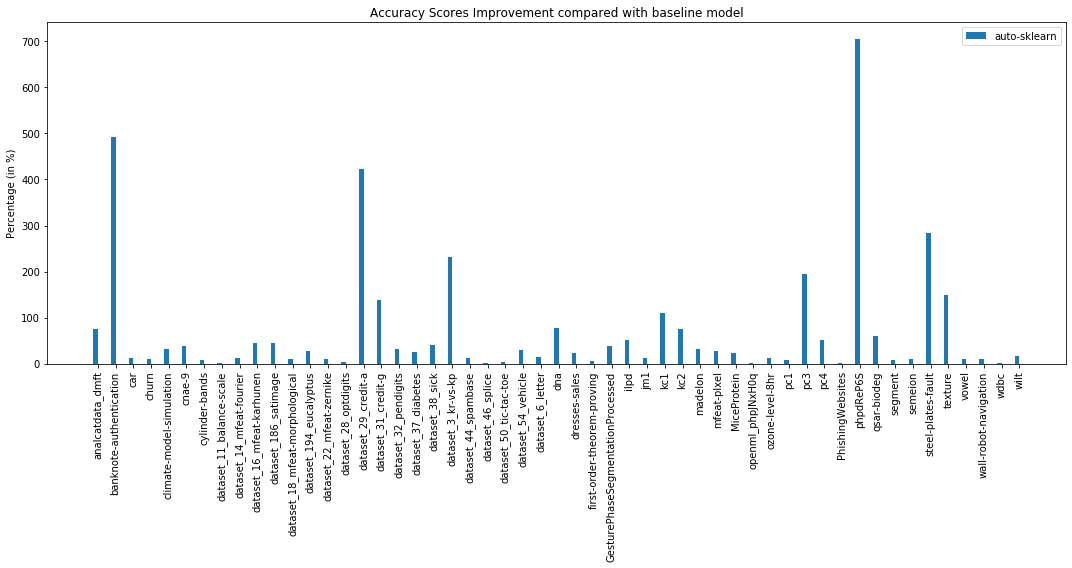

In [6]:
plt.figure(figsize=(15,8))
labels = result['dataset'].values
x = np.arange(len(labels))  
width = 0.25
rects1 = plt.bar(x - width/2,result['acc_ratio'].values, width, label='auto-sklearn')
plt.ylabel('Percentage (in %)')
plt.title('Accuracy Scores Improvement compared with baseline model')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.tight_layout()
#plt.savefig('acc_improve_vs_sgd.png')
plt.show()

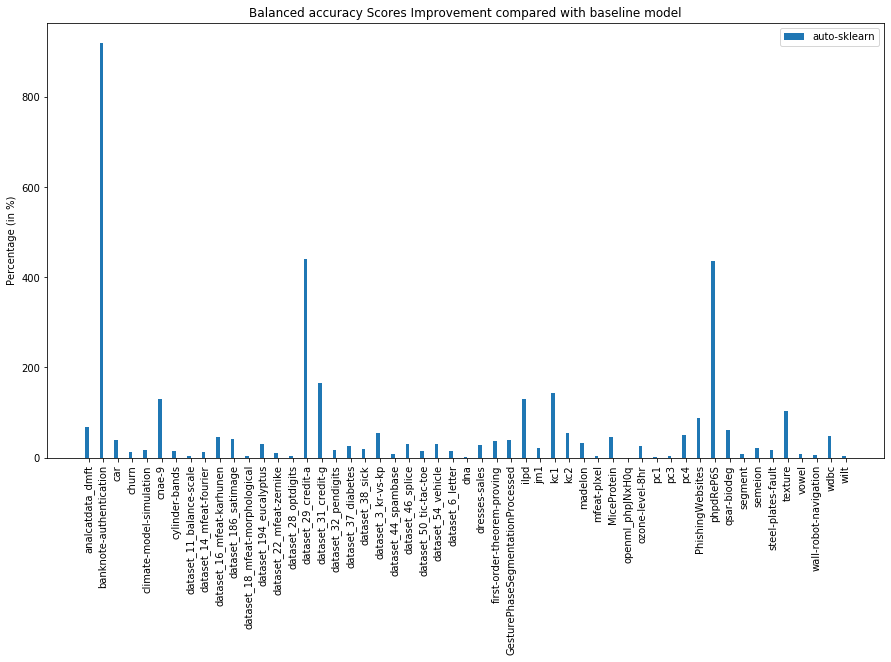

In [109]:
plt.figure(figsize=(15,8))
labels = result['dataset'].values
x = np.arange(len(labels))  
a
width = 0.25
rects1 = plt.bar(x - width/2,result['bacc_ratio'].values, width, label='auto-sklearn')
plt.ylabel('Percentage (in %)')
plt.title('Balanced accuracy Scores Improvement compared with baseline model')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
fig.tight_layout()
plt.savefig('bacc_improve_vs_sgd.png')
plt.show()

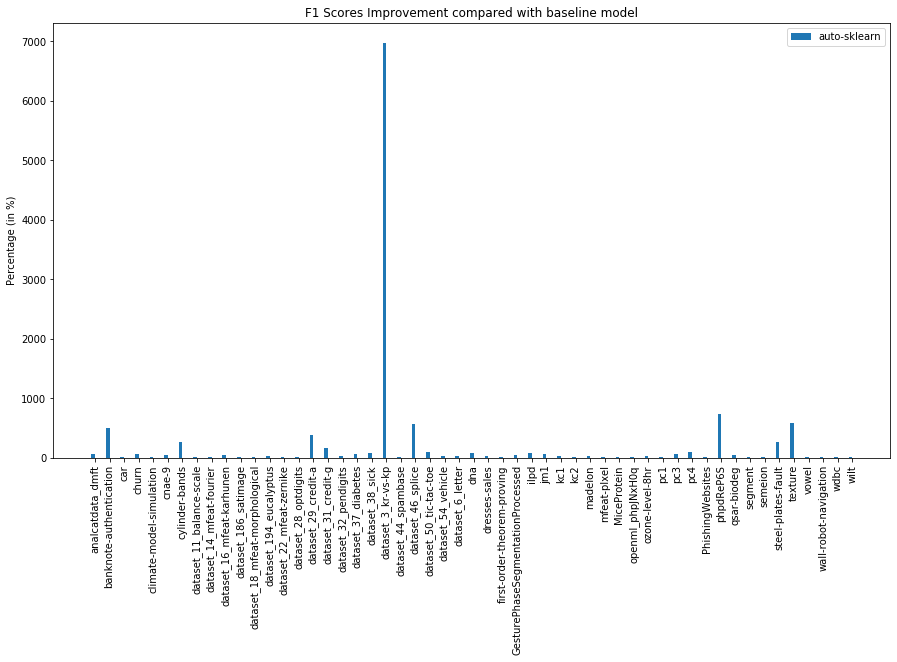

In [110]:
plt.figure(figsize=(15,8))
labels = result['dataset'].values
x = np.arange(len(labels))  
width = 0.25
rects1 = plt.bar(x - width/2,result['f1_ratio'].values, width, label='auto-sklearn')
plt.ylabel('Percentage (in %)')
plt.title('F1 Scores Improvement compared with baseline model')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
fig.tight_layout()
plt.savefig('f1_improve_vs_sgd.png')
plt.show()

### MCTML vs Autosklearn

In [7]:
auto_mct = pd.read_csv('mct_vs_autosklearn.csv')

In [8]:
auto_mct.head(3)

dataset  auto_half_acc  auto_half_bacc  auto_half_f1  \
0         analcatdata_dmft       0.187500        0.184171      0.187500   
1           bank-marketing       0.906226        0.780692      0.947822   
2  banknote-authentication       1.000000        1.000000      1.000000   

   mct_half_acc  mct_half_bacc  mct_half_f1   acc_ratio  bacc_ratio  \
0      1.000000       1.000000     1.000000  433.333333  442.972355   
1      0.985549       0.980469     0.985549    8.753152   25.589625   
2      0.885000       0.857809     0.335260  -11.500000  -14.219097   

     f1_ratio  
0  433.333333  
1    3.980424  
2  -66.473988

In [161]:
#auto_mct = pd.concat([autosklearn,mctml.iloc[:,2:]],axis=1, join='inner')
#auto_mct

In [173]:
auto_mct.to_csv('mct_vs_autosklearn.csv',index=None)

In [9]:
auto_mct['acc_ratio'] = (auto_mct['mct_half_acc'] - auto_mct['auto_half_acc']) / auto_mct['auto_half_acc'] * 100
auto_mct['bacc_ratio'] = (auto_mct['mct_half_bacc'] - auto_mct['auto_half_bacc']) / auto_mct['auto_half_bacc'] * 100
auto_mct['f1_ratio'] = (auto_mct['mct_half_f1'] - auto_mct['auto_half_f1']) / auto_mct['auto_half_f1'] * 100

In [10]:
def win_draw_loss(X):
    win,draw,loss = 0,0,0
    for x in X:
        if np.abs(x) <= 5:
            draw += 1
        elif x>0:
            win += 1
        else:
            loss += 1
    return win,draw,loss

In [11]:
print(win_draw_loss(auto_mct['acc_ratio'].values))

(20, 8, 12)


In [12]:
print(win_draw_loss(auto_mct['bacc_ratio'].values))

(15, 10, 15)


In [13]:
print(win_draw_loss(auto_mct['f1_ratio'].values))

(14, 10, 16)


In [14]:
# find out which dataset not better
drop_index = auto_mct[auto_mct['bacc_ratio']<-20].index

In [15]:
auto_mct.drop(drop_index,inplace=True)
auto_mct.shape

(40, 10)

In [16]:
auto_mct['acc_ratio'] = auto_mct['acc_ratio'].apply(lambda x:np.abs(x))
auto_mct['acc_ratio'].sum()/ auto_mct.shape[0]

23.99100948617097

In [17]:
auto_mct['bacc_ratio'] = auto_mct['bacc_ratio'].apply(lambda x:np.abs(x))
auto_mct['bacc_ratio'].sum()/ auto_mct.shape[0]

28.666850350805667

#### Print the second compare

In [ ]:
#dataset: 

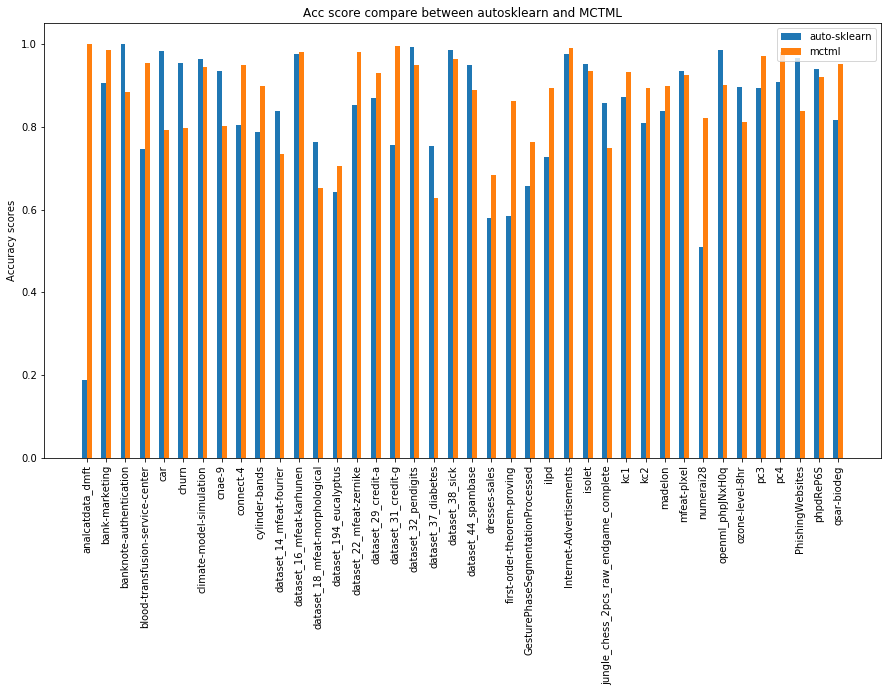

In [192]:
labels = auto_mct['dataset'].values
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, auto_mct['auto_half_acc'], width, label='auto-sklearn')
rects2 = ax.bar(x + width/2, auto_mct['mct_half_acc'], width, label='mctml')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy scores')
ax.set_title('Acc score compare between autosklearn and MCTML')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()
#ax.set_ylim([0.45,0.65])
#fig.tight_layout()
plt.savefig('auto_mct_acc.png')
plt.show()

In [18]:
auto_mct.head(2)

dataset  auto_half_acc  auto_half_bacc  auto_half_f1  \
0  analcatdata_dmft       0.187500        0.184171      0.187500   
1    bank-marketing       0.906226        0.780692      0.947822   

   mct_half_acc  mct_half_bacc  mct_half_f1   acc_ratio  bacc_ratio  \
0      1.000000       1.000000     1.000000  433.333333  442.972355   
1      0.985549       0.980469     0.985549    8.753152   25.589625   

     f1_ratio  
0  433.333333  
1    3.980424

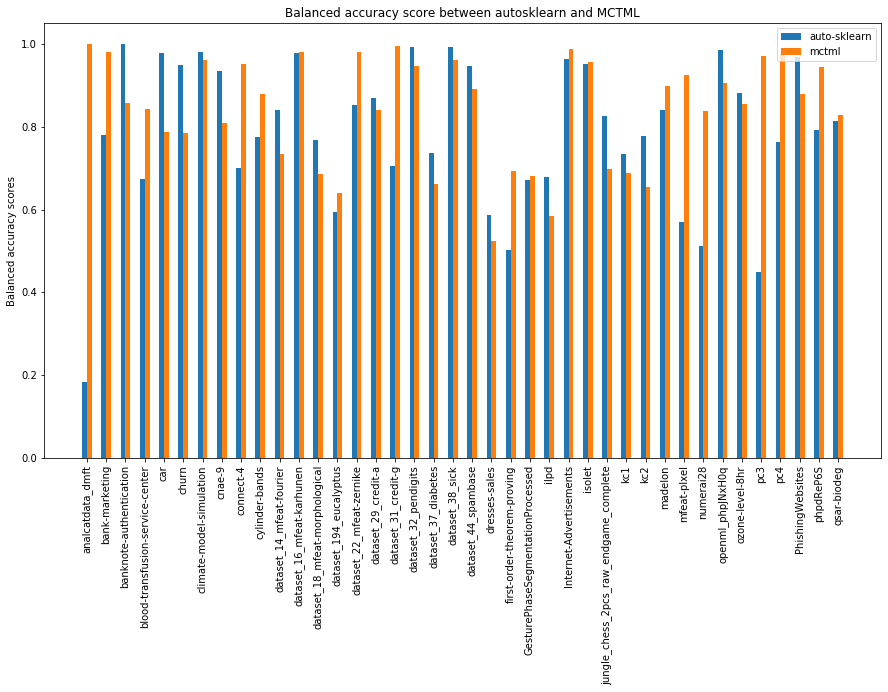

In [21]:
labels = auto_mct['dataset'].values
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, auto_mct['auto_half_bacc'], width, label='auto-sklearn')
rects2 = ax.bar(x + width/2, auto_mct['mct_half_bacc'], width, label='mctml')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Balanced accuracy scores')
ax.set_title('Balanced accuracy score between autosklearn and MCTML')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()
#ax.set_ylim([0.45,0.65])
#fig.tight_layout()
plt.savefig('auto_mct_bacc.png')
plt.show()

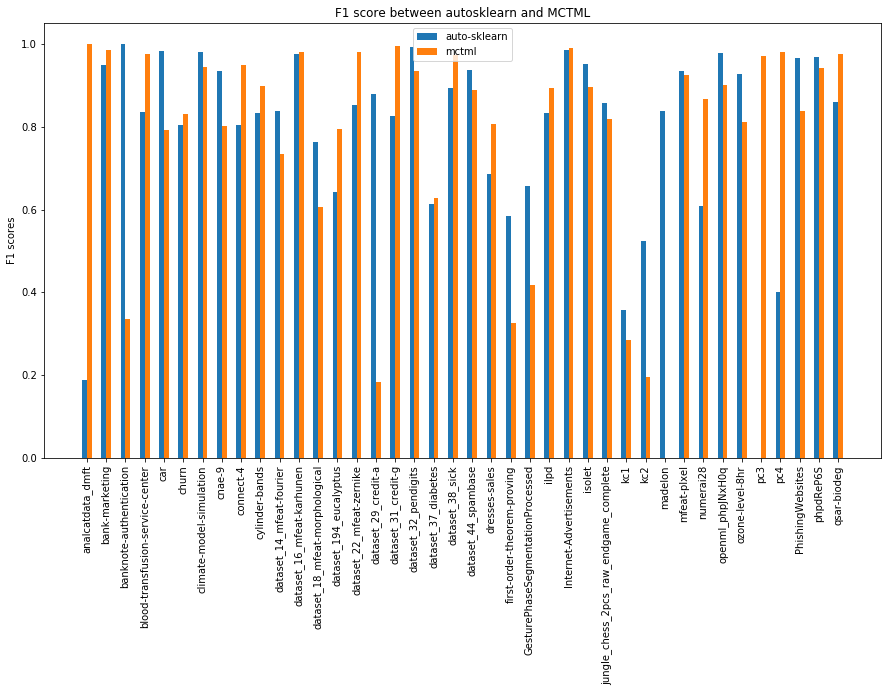

In [22]:
labels = auto_mct['dataset'].values
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, auto_mct['auto_half_f1'], width, label='auto-sklearn')
rects2 = ax.bar(x + width/2, auto_mct['mct_half_f1'], width, label='mctml')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 scores')
ax.set_title('F1 score between autosklearn and MCTML')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()
#ax.set_ylim([0.45,0.65])
#fig.tight_layout()
plt.savefig('auto_mct_f1.png')
plt.show()

In [182]:
selected_datasets = ['dataset_31_credit-g',
'climate-model-simulation',
'dresses-sales',
'dataset_14_mfeat-fourier',
'isolet',
'ozone-level-8hr',
'cylinder-bands',
'qsar-biodeg',
'dataset_32_pendigits']

In [ ]:
values

In [203]:
auto_values = []
mct_values = []
for i in selected_datasets:
    ind = list(auto_mct['dataset'].values).index(i)
    auto_values.append(auto_mct.iloc[ind,1])
    mct_values.append(auto_mct.iloc[ind,4])

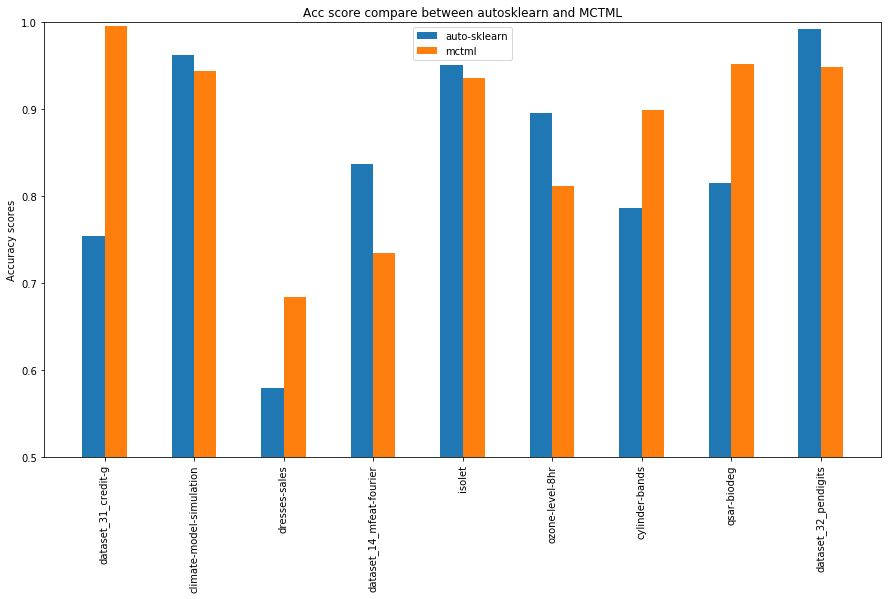

In [206]:
labels = selected_datasets
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, auto_values, width, label='auto-sklearn')
rects2 = ax.bar(x + width/2, mct_values, width, label='mctml')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy scores')
ax.set_title('Acc score compare between autosklearn and MCTML')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()
ax.set_ylim([0.5,1.0])
#fig.tight_layout()
plt.savefig('auto_mct_acc_sub.png')
plt.show()